### полезные ссылки:
https://www.wisedata.app/blog/transform-pandas-dataframe-with-nl

In [34]:
import pandas as pd

In [35]:
df = pd.read_excel("./data/data-5580-2023-10-09.xlsx")

/home/fitlemon/code/python_for_ds/.venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [36]:
df.head()

,ID,Violator,global_id,TypeOfViolation,TakenMeasures,Date,AmountOfPenalty
0,Код,Нарушитель,global_id,Вид нарушения,Принятые меры,Дата принятия мер,"Сумма штрафа, руб."
1,14749,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ «БАРК...,272823246,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,08.06.2015,150000
2,16605,ООО «ВЕКТОР»,272865705,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,05.06.2015,150000
3,15340,Общество с ограниченной ответственностью «ФМ-И...,272865707,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,30.07.2015,150000
4,12643,ООО «Лакистройтехно»,272865708,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,10.07.2015,150000


In [37]:
df = df.loc[1:]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 1 to 5091
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               5091 non-null   object
 1   Violator         5091 non-null   object
 2   global_id        5091 non-null   object
 3   TypeOfViolation  5091 non-null   object
 4   TakenMeasures    5091 non-null   object
 5   Date             5091 non-null   object
 6   AmountOfPenalty  5091 non-null   object
dtypes: object(7)
memory usage: 278.5+ KB


In [39]:
df["TypeOfViolation"] = df["TypeOfViolation"].astype("category")

In [40]:
df["TypeOfViolation"].nunique()

4

In [41]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 1 to 5091
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               5091 non-null   object        
 1   Violator         5091 non-null   object        
 2   global_id        5091 non-null   object        
 3   TypeOfViolation  5091 non-null   category      
 4   TakenMeasures    5091 non-null   object        
 5   Date             5091 non-null   datetime64[ns]
 6   AmountOfPenalty  5091 non-null   object        
dtypes: category(1), datetime64[ns](1), object(5)
memory usage: 243.9+ KB


In [43]:
df["TakenMeasures"].nunique()

1

#### Установка столбца ID как индекса:

In [44]:
df.set_index("ID", inplace=True)

In [45]:
df.head()

,Violator,global_id,TypeOfViolation,TakenMeasures,Date,AmountOfPenalty
ID,,,,,,
14749,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ «БАРК...,272823246,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,2015-06-08,150000
16605,ООО «ВЕКТОР»,272865705,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,2015-06-05,150000
15340,Общество с ограниченной ответственностью «ФМ-И...,272865707,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,2015-07-30,150000
12643,ООО «Лакистройтехно»,272865708,управление многоквартирным домом без лицензии,получен результат суда назначен штраф,2015-07-10,150000
12676,ООО «Артинжстрой»,282754014,нарушение правил управления многоквартирным домом,получен результат суда назначен штраф,2015-10-20,150000


#### Проверка наличия дубликатов:

In [46]:
df.drop_duplicates().shape[0] == df.shape[0]

True

#### Вывод всех возможных нарушений

In [47]:
df["TypeOfViolation"].unique()

['управление многоквартирным домом без лицензии', 'нарушение правил управления многоквартирным д..., 'управление многоквартирным домом с нарушением..., 'невыполнение предписания об устранении наруше...]
Categories (4, object): ['нарушение правил управления многоквартирным д..., 'невыполнение предписания об устранении наруше..., 'управление многоквартирным домом без лицензии', 'управление многоквартирным домом с нарушением...]

#### Вывод количество случаев по каждому типу нарушения

In [48]:
df["TypeOfViolation"].value_counts()

TypeOfViolation
управление многоквартирным домом с нарушением лицензионных требований       2699
невыполнение предписания об устранении нарушений лицензионных требований    2022
нарушение правил управления многоквартирным домом                            349
управление многоквартирным домом без лицензии                                 21
Name: count, dtype: int64

## Упражнение № 2

In [49]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv"
)

In [50]:
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [52]:
df.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [54]:
cons_iqr = round(df["consumption"].quantile(0.75) - df["consumption"].quantile(0.25), 2)
cons_iqr

25.77

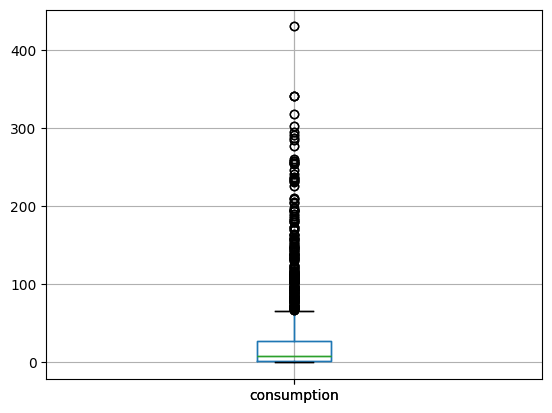

In [68]:
import matplotlib.pyplot as plt

df.boxplot(column="consumption")
plt.show()

In [70]:
df.sort_values(by="consumption", ascending=False)

,country,food_category,consumption,co2_emmission
149,Finland,Milk - inc. cheese,430.76,613.57
259,Netherlands,Milk - inc. cheese,341.47,486.39
116,Sweden,Milk - inc. cheese,341.23,486.05
248,Switzerland,Milk - inc. cheese,318.69,453.94
28,Albania,Milk - inc. cheese,303.72,432.62
...,...,...,...,...
680,Algeria,Soybeans,0.00,0.00
1395,Sri Lanka,Soybeans,0.00,0.00
658,Serbia,Soybeans,0.00,0.00
1208,Congo,Soybeans,0.00,0.00


In [118]:
df.groupby("food_category")["consumption"].max().reset_index()

,food_category,consumption
0,Beef,55.48
1,Eggs,19.15
2,Fish,179.71
3,Lamb & Goat,21.12
4,Milk - inc. cheese,430.76
5,Nuts inc. Peanut Butter,23.03
6,Pork,67.11
7,Poultry,62.50
8,Rice,171.73
9,Soybeans,16.95


In [121]:
df.groupby("food_category")["consumption"].max().reset_index().merge(
    right=df[["consumption", "country"]], on="consumption"
)

,food_category,consumption,country
0,Beef,55.48,Argentina
1,Eggs,19.15,Japan
2,Fish,179.71,Maldives
3,Lamb & Goat,21.12,Iceland
4,Milk - inc. cheese,430.76,Finland
5,Nuts inc. Peanut Butter,23.03,United Arab Emirates
6,Pork,67.11,Hong Kong SAR. China
7,Poultry,62.50,Israel
8,Rice,171.73,Bangladesh
9,Soybeans,16.95,Taiwan. ROC
